# Using callbacks to monitor Ivis performance

A callback is an object that can perform a useful action at a specific stage of model training. In addition to supporting [traditional tensorflow callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) that ship with tensorflow, [`Ivis`](https://github.com/beringresearch/ivis) callbacks can be used to:

* Create a model checkpoint
* Save intermediate embeddings
* Visualise intermediate embeddings
* Send outputs to Tensorboard

You can checkout a more detailed API on our [documentation page](https://bering-ivis.readthedocs.io/en/latest/api.html#module-ivis.nn.callbacks).

In [ ]:
!pip install git+https://github.com/beringresearch/ivis

In [1]:
# Ivis uses several stochastic processes.
# To make sure that results are consistent from one run to another,
# we fix the random seed

import os
os.environ["PYTHONHASHSEED"]="1234"

import random
import numpy as np

import tensorflow as tf

np.random.seed(1234)
random.seed(1234)
tf.random.set_seed(1234)

## 1. Data Import and Processing

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = load_breast_cancer()

In [4]:
X = data['data']
y = data['target']

In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## 2. Using callbacks with Ivis

In [9]:
import tensorflow as tf

from ivis.nn.callbacks import EmbeddingsImage, EmbeddingsLogging, ModelCheckpoint
from ivis import Ivis

In [7]:
# Keras callback logging training loss at the end of every epoch
logger = tf.keras.callbacks.CSVLogger('ivis_loss.log', append=False)

# Generate an embedding plot at the end of every epoch. Requires seaborn
image_viewer = EmbeddingsImage(data=X)

# Save ivis model at the end of every epoch
checkpoint = ModelCheckpoint()

In [10]:
ivis = Ivis(model='maaten', k=15, n_epochs_without_progress=5,
           callbacks=[logger, image_viewer, checkpoint])

In [11]:
ivis.fit(X)

100%|██████████| 569/569 [00:00<00:00, 54949.32it/s]

Building KNN index
Extracting KNN neighbours



100%|██████████| 569/569 [00:00<00:00, 4773.70it/s]


Training neural network
Epoch 1/1000
5/5 [==============================] - 1s 38ms/step - loss: 1.0943
Epoch 2/1000
5/5 [==============================] - 0s 29ms/step - loss: 1.0436
Epoch 3/1000
5/5 [==============================] - 0s 29ms/step - loss: 1.2691
Epoch 4/1000
5/5 [==============================] - 0s 31ms/step - loss: 1.0836
Epoch 5/1000
5/5 [==============================] - 0s 29ms/step - loss: 1.1564
Epoch 6/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.9438
Epoch 7/1000
5/5 [==============================] - 0s 28ms/step - loss: 1.0560
Epoch 8/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.8397
Epoch 9/1000
5/5 [==============================] - 0s 34ms/step - loss: 0.8555
Epoch 10/1000
5/5 [==============================] - 0s 33ms/step - loss: 0.7674
Epoch 11/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.6015
Epoch 12/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.6829
Epoch 13/1000

Ivis(annoy_index_path='annoy.index',
     callbacks=[<tensorflow.python.keras.callbacks.CSVLogger object at 0x7fd1dbe17a90>,
     k=15, model='maaten', n_epochs_without_progress=5,
     neighbour_matrix=<ivis.data.neighbour_retrieval.knn.AnnoyKnnMatrix object at 0x7fd1dad9f940>)

This training run will generate two directories - `./logs` and `./model_checkpoints` for epoch-wise embeddings and intermediate models respectively. Names of these directories are fully configurable.

## 3. Visualise final embeddings

In [12]:
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [13]:
embeddings = ivis.transform(X)

5/5 [==============================] - 0s 4ms/step


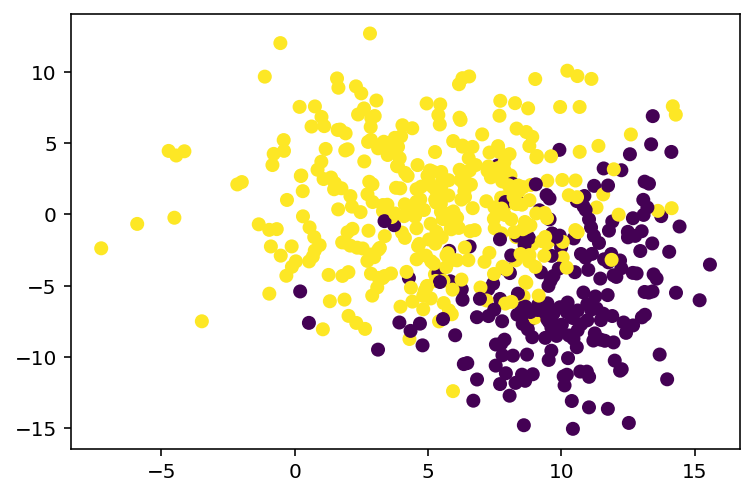

In [15]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y)